In [1]:
# =====================================================
# MODELO CON MULTIPLES ENTRADAS
# =====================================================

import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow.keras.layers import Input, Dense, Concatenate
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.models import Model


In [2]:
# -----------------------
# CARGA DE DATOS
# -----------------------

data = load_iris()
X = data.data
y = data.target

df = pd.DataFrame(X, columns=data.feature_names)

# Crear flag según longitud del pétalo
df2 = pd.DataFrame()
df2["petal_length_flag"] = (df["petal length (cm)"] > df["petal length (cm)"].mean()).astype(int)


In [3]:
# Partir dataset
X1 = df[data.feature_names].values
X2 = df2[["petal_length_flag"]].values

X1_train, X1_test, X2_train, X2_test, y_train, y_test = train_test_split(
    X1, X2, y, test_size=0.2, random_state=42
)


In [4]:
# Normalizar entrada principal
scaler = StandardScaler()
X1_train = scaler.fit_transform(X1_train)
X1_test = scaler.transform(X1_test)


In [5]:
# -----------------------
# DEFINICION DEL MODELO
# -----------------------

input_main = Input(shape=(4,), name="caracteristicas")
input_flag = Input(shape=(1,), name="flag")

# procesar entrada principal
x1 = Dense(8, activation="tanh")(input_main)

# concatenar flag
merged = Concatenate()([x1, input_flag])

output = Dense(3, activation="softmax")(merged)

model = Model(inputs=[input_main, input_flag], outputs=output)

model.compile(optimizer=SGD(learning_rate=0.1),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 caracteristicas (InputLayer)   [(None, 4)]          0           []                               
                                                                                                  
 dense (Dense)                  (None, 8)            40          ['caracteristicas[0][0]']        
                                                                                                  
 flag (InputLayer)              [(None, 1)]          0           []                               
                                                                                                  
 concatenate (Concatenate)      (None, 9)            0           ['dense[0][0]',                  
                                                                  'flag[0][0]']               

In [6]:
# -----------------------
# ENTRENAMIENTO
# -----------------------
print("Entrenando ...\n")
history = model.fit(
    [X1_train, X2_train],
    y_train,
    # validation_data=([X1_test, X2_test], y_test),
    validation_split = 0.2,
    epochs=50,
    batch_size=20,
    verbose=0
)

print("Entrenamiento finalizado.")

Entrenando ...

Entrenamiento finalizado.


1/1 [==============================] - 0s 101ms/step

Classification Report:

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



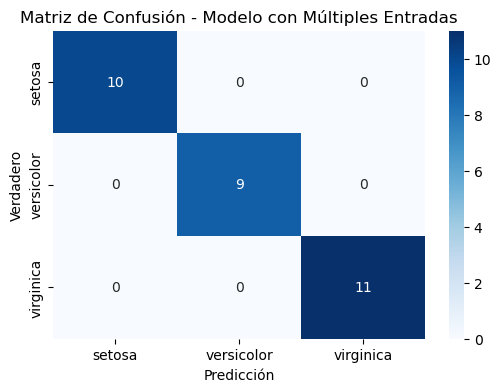

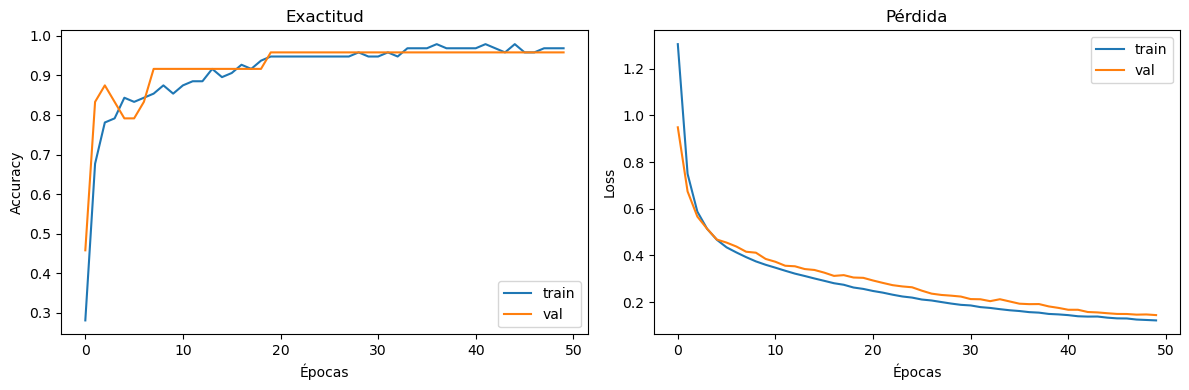

In [7]:
# -----------------------
# PREDICCIONES Y MÉTRICAS
# -----------------------

y_pred = model.predict([X1_test, X2_test])
y_pred_classes = np.argmax(y_pred, axis=1)

print("\nClassification Report:\n")
print(classification_report(y_test, y_pred_classes,
                            target_names=data.target_names))

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred_classes)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, cmap="Blues",
            xticklabels=data.target_names,
            yticklabels=data.target_names)
plt.xlabel("Predicción")
plt.ylabel("Verdadero")
plt.title("Matriz de Confusión - Modelo con Múltiples Entradas")
plt.show()

# -----------------------
# CURVAS DE ENTRENAMIENTO
# -----------------------

plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Exactitud')
plt.xlabel('Épocas')
plt.ylabel('Accuracy')
plt.legend(['train','val'])

plt.subplot(1,2,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Pérdida')
plt.xlabel('Épocas')
plt.ylabel('Loss')
plt.legend(['train','val'])

plt.tight_layout()
plt.show()
